In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [3]:
base = pd.read_csv('Real_estate.csv')
base.shape

(414, 8)

In [5]:
base.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
base = base.drop(['No'], axis = 1)
base.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [26]:
X = base.iloc[:, 2].values
y = base.iloc[:, 6].values

In [27]:
X
#y

array([  84.87882,  306.5947 ,  561.9845 ,  561.9845 ,  390.5684 ,
       2175.03   ,  623.4731 ,  287.6025 , 5512.038  , 1783.18   ,
        405.2134 ,   90.45606,  492.2313 , 2469.645  , 1164.838  ,
        579.2083 ,  292.9978 ,  350.8515 ,  368.1363 ,   23.38284,
       2275.877  ,  279.1726 , 1360.139  ,  279.1726 ,  480.6977 ,
       1487.868  ,  383.8624 ,  276.449  ,  557.478  ,  451.2438 ,
       4519.69   ,  769.4034 ,  488.5727 ,  323.655  ,  205.367  ,
       4079.418  , 1935.009  , 1360.139  ,  577.9615 ,  289.3248 ,
       4082.015  , 4066.587  ,  519.4617 ,  512.7871 ,  533.4762 ,
        488.8193 ,  463.9623 ,  640.7391 , 4605.749  , 4510.359  ,
        512.5487 , 1758.406  , 1438.579  ,  492.2313 ,  289.3248 ,
       1160.632  ,  371.2495 ,   56.47425, 4510.359  ,  336.0532 ,
       1931.207  ,  259.6607 , 2175.877  ,  533.4762 ,  995.7554 ,
        123.7429 ,  193.5845 ,  104.8101 ,  464.223  ,  561.9845 ,
         90.45606,  640.7391 ,  424.5442 , 4082.015  ,  379.55

In [28]:
correlation = np.corrcoef(X, y)
correlation

array([[ 1.        , -0.67361286],
       [-0.67361286,  1.        ]])

In [29]:
X = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [31]:
model.intercept_

45.851427057774984

In [32]:
model.coef_

array([-0.00726205])

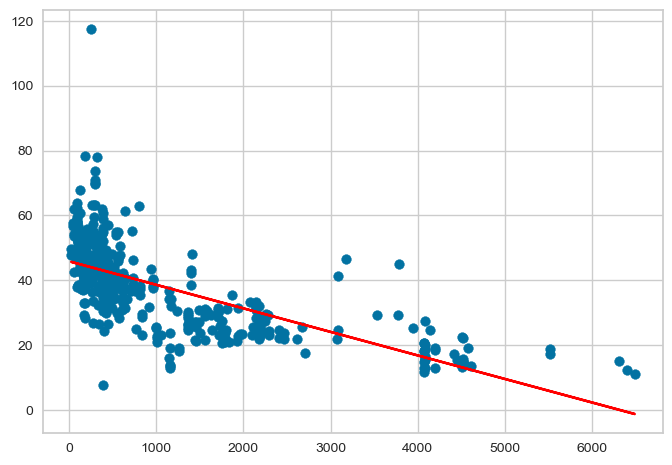

In [33]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color = 'red')

In [39]:
#model.intercept_ + model.coef_ * 2000
model.predict([[2000]])

array([31.32732382])

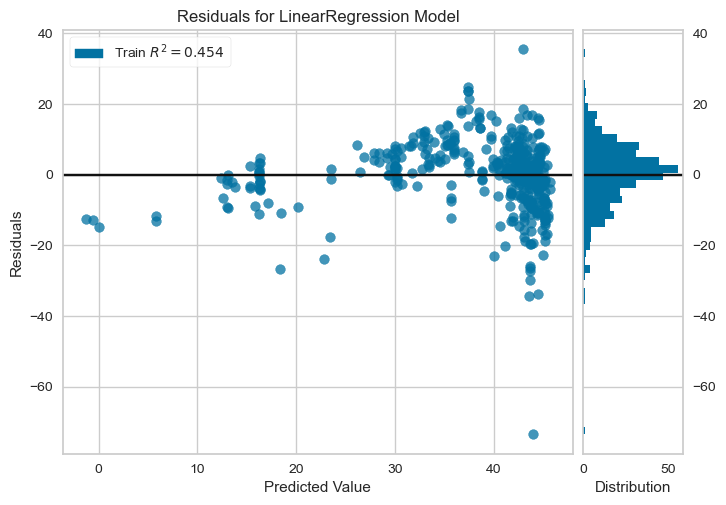

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [40]:
res = ResidualsPlot(model)
res.fit(X, y)
res.poof()